# Análise do Titanic

Quero que você faça uma análise da tragédia do Titanic, verifique quais são as características mais importantes para a morte de um indivíduo nessa tragédia. Para isso, você vai utilizar os dados que estão no arquivo **titanic.csv** na pasta **dados**. Esses dados foram retirados da plataforma Kaggle, para maiores informações sobre as colunas e seus valores acessar [aqui](https://www.kaggle.com/c/titanic/data).

### Importando os pacotes para análise

In [2]:
# para manipulação dos dados
import pandas as pd
# para visualização
from plotnine import *
import matplotlib.pyplot as plt

# para que os gráficos sejam
# mostrados
%matplotlib inline

C:\Users\Joao\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Carregando o conjunto de dados

Carregue o conjunto de dados, que se encontra em *"../dados/titanic.csv"*, com auxílio do método ```pd.read_csv```

In [3]:
# Para mais informações sobre
# o funcionamento do método
# execute o seguinte comando:
# ?pd.read_csv

# Faça o carregamento aqui.
df = pd.read_csv('../dados/titanic.csv')

### Tendo uma visão geral do conjunto de dados

Imprima as 10 primeira linhas do dataframe com o método ```df.head``` e, em seguita, imprima as estatísticas gerais do conjunto de dados com o método ```df.describe```.

In [4]:
# use o head aqui...
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# use o método describe aqui...
# lembre-se de utilizar o argumento
# `include="all"`, para obter as
# estatísticas das colunas categóricas e numéricas.
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Coleff, Mr. Satio",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Primeiro gráfico

No gráfico a seguir, queríamos construir um boxplot para cada classe, porém a coluna Pclass é foi inferida como numérica.

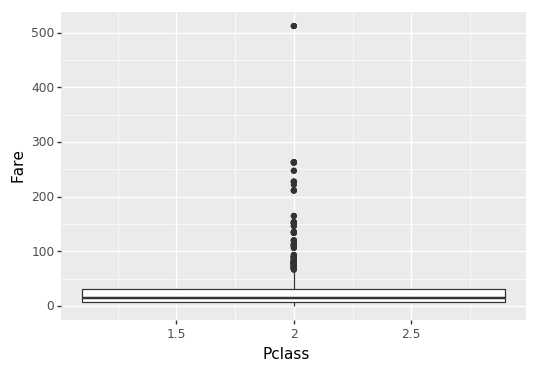

<ggplot: (8737760772221)>

In [6]:
ggplot(df, aes(x = "Pclass", y = "Fare")) + \
geom_boxplot()

O plotnine nos provê uma forma muito simples de contornar esse problema, utilizando a expressão **factor** juntamente com nome da coluna que queremos que seja tratada como categórica. Veja o exemplo abaixo.

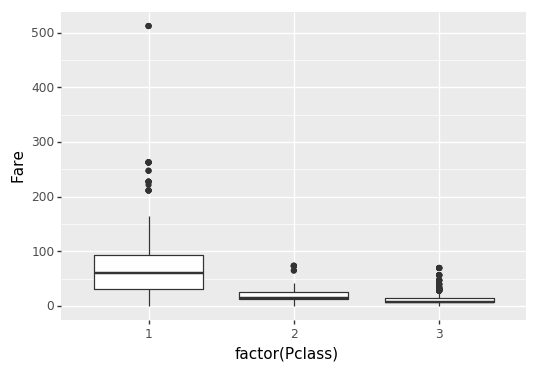

<ggplot: (8737760793629)>

In [7]:
ggplot(df, aes(x = "factor(Pclass)", y = "Fare")) + \
geom_boxplot()

Além dessa alternativa, nós podemos de fato transformar as colunas em categóricas como vai ser mostrado a seguir.

### Transformando colunas Survived e Pclass em categóricas

Note que os tipos das colunas Survived e Pclass foram armazenadas com valores numéricos e , portanto, o pandas inferiu que elas fossem numéricas no dataframe. Porém, elas tem mais uma conotação de categoria, pois estamos classificando algo com elas. Portanto, vamos tratá-las como colunas categóricas. Para isso, precisamos apenas converter para o tipo do pandas chamado "category".

In [12]:
# Estou transformando os rótulos `zero` e `um` em algo mais legível com a função apply
# e, então, convertendo a series para o tipo categórico com a função astype
df['cat_Survived'] = df.Survived.apply(lambda x: ["morreu", "sobreviveu"][x]).astype("category")

# veja o resultado a seguir
df['cat_Survived'].head()

0        morreu
1    sobreviveu
2    sobreviveu
3    sobreviveu
4        morreu
Name: cat_Survived, dtype: category
Categories (2, object): [morreu, sobreviveu]

In [13]:
# Faça o mesmo com a coluna Pclass
df['cat_Pclass'] = df.Pclass.astype("category")

df['cat_Pclass'].head()

0    3
1    1
2    3
3    1
4    3
Name: cat_Pclass, dtype: category
Categories (3, int64): [1, 2, 3]

### Execute o df.describe novamente

In [14]:
# use o método describe aqui...
# lembre-se de utilizar o argumento
# `include="all"`, para obter as
# estatísticas das colunas categóricas e numéricas.
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cat_Pclass,cat_Survived
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889,891.0,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3,3.0,2
top,NaN,NaN,NaN,"Coleff, Mr. Satio",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S,3.0,morreu
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644,491.0,549
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,NaN,NaN


### Visualizando  como valor dos tickets influenciam na sobrevivência

C:\Users\Joao\Anaconda3\lib\site-packages\plotnine\geoms\geom_crossbar.py:86: UserWarning: Notch went outside hinges. Try setting notch=False.
  warn("Notch went outside hinges."


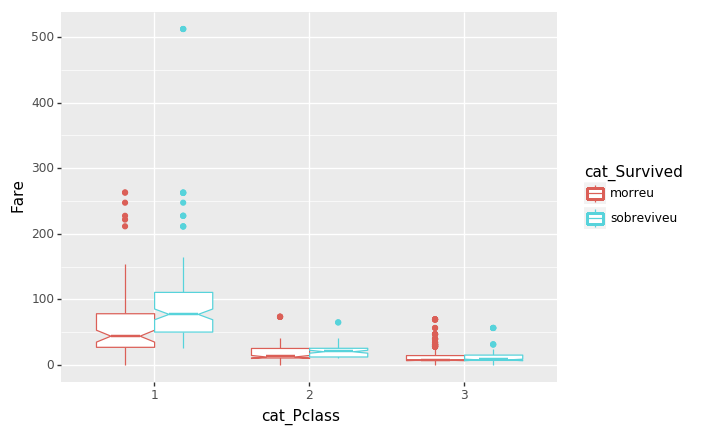

<ggplot: (155233910385)>

In [15]:
ggplot(df, aes(x = "cat_Pclass", y = "Fare", color="cat_Survived")) + \
geom_boxplot(notch=True)

É possível notar que para primeira classe há uma diferença entre a mediana dos grupos, ou seja, o preço do tickets tem uma certa influência na chance de sobreviência. Todavia, não é o único fator. Para as demais classes é difícil de ver essa diferença devido a escala do valor dos tickets em cada grupo. Em outras palavras, o preço do tickets da primeira classe é muito maior que o preço dos tickets da segunda e terceira.

Uma forma de contornar esse problema seria deixar os valores em uma mesma escala. Para isso, nós poderíamos dividir os valores em cada grupo por seus respectivos valores máximos.

Para isso, iremos utilizar o método ```groupby``` em conjunto com o ```apply```. O exemplo a seguir mostra como:

In [20]:
# agrupamos os valores dos tickets por classe e, então,
# cada um desses valores é divido pelo valor máximo da classe
df['scaledFare'] = df.groupby('cat_Pclass').Fare.apply(lambda class_fares: class_fares / class_fares.max())

C:\Users\Joao\Anaconda3\lib\site-packages\plotnine\geoms\geom_crossbar.py:86: UserWarning: Notch went outside hinges. Try setting notch=False.
  warn("Notch went outside hinges."


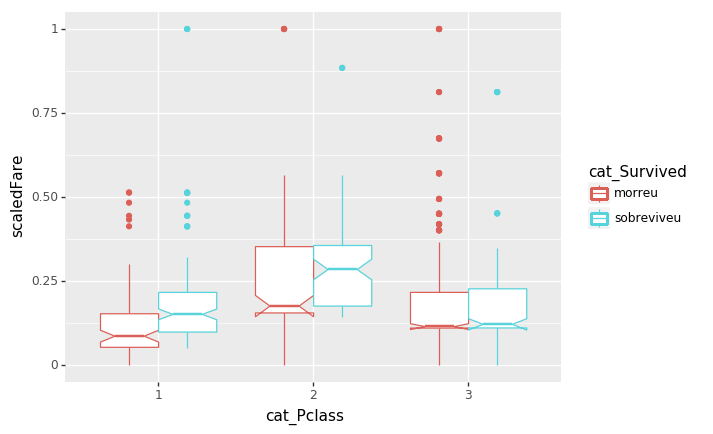

<ggplot: (155234512483)>

In [23]:
ggplot(df, aes(x = "cat_Pclass", y = "scaledFare", color="cat_Survived")) + \
geom_boxplot(notch=True)

### Visualizando  como idade e gênero afetam a sobrevivência

Trace um boxplot para tentar visualizar como idade e gênero afetam a sobrevivência.

C:\Users\Joao\Anaconda3\lib\site-packages\plotnine\layer.py:363: UserWarning: stat_boxplot : Removed 177 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


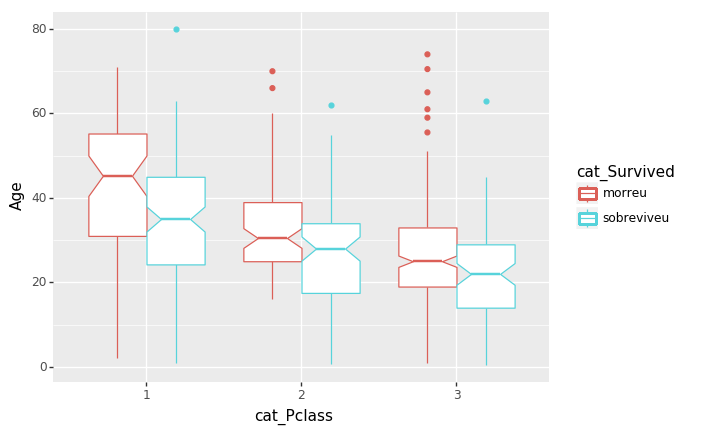

<ggplot: (155234888547)>

In [27]:
grafico = ggplot(df, aes(x = "cat_Pclass", y = "Age", color="cat_Survived"))
grafico += geom_boxplot(notch=True)
grafico

C:\Users\Joao\Anaconda3\lib\site-packages\plotnine\layer.py:363: UserWarning: stat_boxplot : Removed 177 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
C:\Users\Joao\Anaconda3\lib\site-packages\plotnine\geoms\geom_crossbar.py:86: UserWarning: Notch went outside hinges. Try setting notch=False.
  warn("Notch went outside hinges."


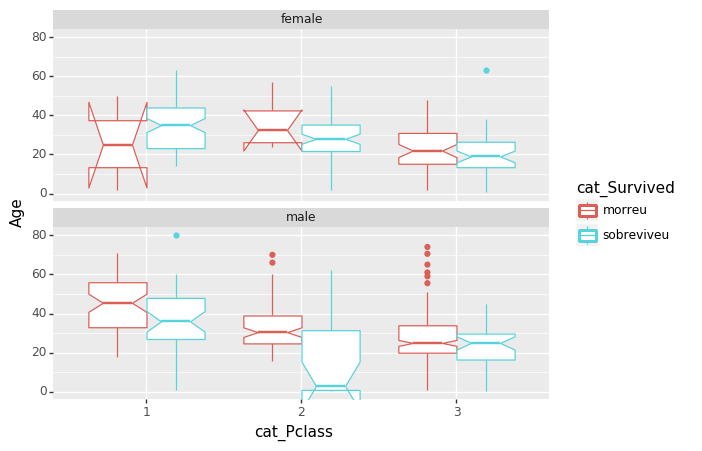

<ggplot: (155234888547)>

In [28]:
# Além do ggplot e boxplot, utilize facet_wrap para dividir o gráfico por gênero.
grafico += facet_wrap('Sex', nrow=2) # complete com facet_wrap
grafico

C:\Users\Joao\Anaconda3\lib\site-packages\plotnine\layer.py:363: UserWarning: stat_boxplot : Removed 177 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
C:\Users\Joao\Anaconda3\lib\site-packages\plotnine\geoms\geom_crossbar.py:86: UserWarning: Notch went outside hinges. Try setting notch=False.
  warn("Notch went outside hinges."
C:\Users\Joao\Anaconda3\lib\site-packages\plotnine\layer.py:450: UserWarning: geom_jitter : Removed 177 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


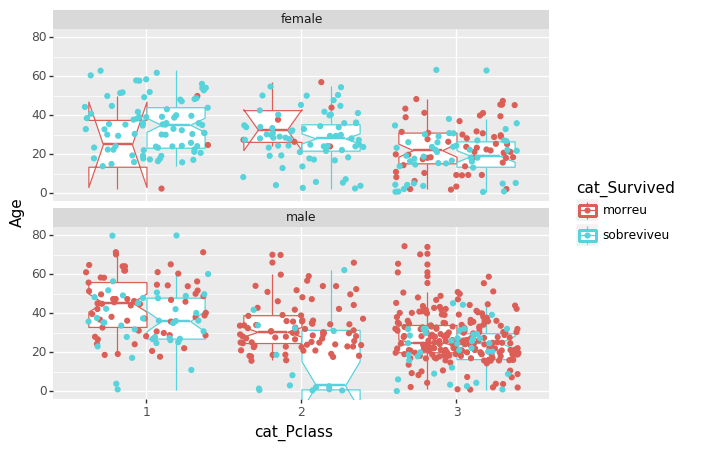

<ggplot: (155234888547)>

In [29]:
# For fim, adicione o geom_jitter. Ele é um bom complemento ao box_plot,
# pois conseguimos ter uma noção de quantidade de pontos no box_plot
grafico += geom_jitter() # complete com geom_jitter
grafico

### Discretizando a Idade

Em análise de dados, muitas vezes é interessante dividir colunas numéricas em intervalos de valores. Isso é discretizar um dado. Para a gente proceguir em nossa análise vamos discretizar a idade dos passageiros, nomeando os intervalos em crinca, adulto e idoso.

Vamos assumir os seguintes intervalos:
    
    1) crianças têm idades no intervalo [0, 15)
    2) adultos têm idades no intervalo [15, 45)
    3) adultos têm idades no intervalo [45, 100]
    
Crie uma nova coluna no dataframe chamada faixa_etaria e povoe-a com as faixas estárias dos passageiros de acordo com a regra acima.

In [32]:
# removendo idades nulas
df.dropna(subset=['Age'], inplace=True)

# criando a coluna faixa_etaria com valores nulos
df['faixa_etaria'] = None

# povoando as linhas dos adultos.
# linhas nas quais a idade está no intervalo [15, 45).
df.loc[(15 <= df.Age) & (df.Age < 45), 'faixa_etaria'] = 'adulto'

# povoe as linhas das crianças.
# linhas nas quais a idade está no intervalo [0, 15).
# descomente a linha abaixo e substitua ... pela expressão correta
df.loc[15 > df.Age, 'faixa_etaria'] = 'crianca'

# povoe as linhas dos idoso.
# linhas nas quais a idade está no intervalo [45, 100].
# descomente a linha abaixo e substitua ... pela expressão correta
df.loc[(45 <= df.Age) & (df.Age <= 100), 'faixa_etaria'] = 'idoso'

In [33]:
df.faixa_etaria.value_counts()

adulto     521
idoso      115
crianca     78
Name: faixa_etaria, dtype: int64

#### Funções cut e qcut

O pandas provê mecanismos de discretização automática através das funções [cut](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html) e [qcut](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html). Para mais informações sobre elas, dê uma olhada na documentação e no exemplo abaixo.

In [34]:
df['faixa_etaria_qcut'] = pd.qcut(df.Age, q=[0, .10, .85, 1.], labels=['crianca', 'adulto', 'idoso'])

In [35]:
df.faixa_etaria_qcut.value_counts()

adulto     534
idoso      103
crianca     77
Name: faixa_etaria_qcut, dtype: int64

### Calculando a proporção de passageiros mortos por classe

In [36]:
def taxa_de_mortalidade(survived_por_grupo):
    """Returna a taxa de mortalidade de um dados grupo
    :param survived_por_grupo: ndarray ou pd.Series.
        valores da coluna cat_Survived por grupo
    :return: float.
        Taxa de mortalidade do grupo
    """
    return (survived_por_grupo == 'morreu').sum() / survived_por_grupo.shape[0]
    
df.groupby(['cat_Pclass']).cat_Survived.aggregate(taxa_de_mortalidade)

cat_Pclass
1    0.344086
2    0.520231
3    0.760563
Name: cat_Survived, dtype: float64

### Calcule a proporção de passageiros mortos por classe e gênero

Substitua os ... pelas colunas da classe e gênero dos passageiros.

In [37]:
# substitua ... pelas colunas da classe e gênero dos passageiros
df.groupby(['cat_Pclass', 'Sex']).cat_Survived.aggregate(taxa_de_mortalidade)

cat_Pclass  Sex   
1           female    0.035294
            male      0.603960
2           female    0.081081
            male      0.848485
3           female    0.539216
            male      0.849802
Name: cat_Survived, dtype: float64

### Calcule a proporção de passageiros mortos por classe, gênero e faixa etária

Substitua os ... pelas colunas da classe, gênero e faixa etária dos passageiros. Por favor, utilizar a coluna **faixa_etaria_qcut** para faixa etária.

In [38]:
taxa = df.groupby(['cat_Pclass', 'Sex', 'faixa_etaria_qcut']).\
            cat_Survived.aggregate(taxa_de_mortalidade).\
            reset_index(name='taxa_mortalidade')
taxa

,cat_Pclass,Sex,faixa_etaria_qcut,taxa_mortalidade
0,1,female,crianca,0.500000
1,1,female,adulto,0.015873
2,1,female,idoso,0.050000
3,1,male,crianca,0.000000
4,1,male,adulto,0.535714
5,1,male,idoso,0.738095
6,2,female,crianca,0.000000
7,2,female,adulto,0.087719
8,2,female,idoso,0.142857
9,2,male,crianca,0.000000


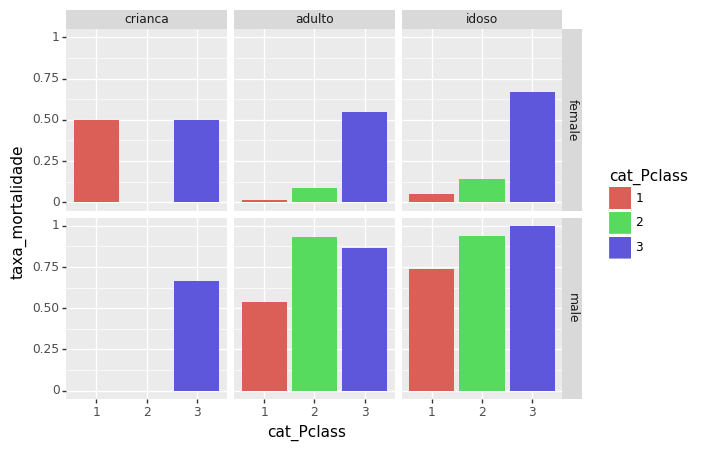

<ggplot: (155235353264)>

In [39]:
ggplot(taxa, aes(x='cat_Pclass', y='taxa_mortalidade', fill='cat_Pclass')) + \
geom_bar(stat='identity') + \
facet_grid('Sex~faixa_etaria_qcut')

### Outras análises

Fique a vontade em fazer outros gráficos e utilizar outras colunas para análises.

### Conclusão

E aí? O que você concluiu?